# 1. Import Required Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load the Encoded Dataset


In [3]:
df = pd.read_csv("../data/ai_job_dataset.csv")
df = df.drop(columns=["company_name", "required_skills", "job_title", "posting_date", "application_deadline"])
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Define Features and Target


In [4]:
X = df_encoded.drop("salary_usd", axis=1)
y = df_encoded["salary_usd"]

# 4. Train-Test Split


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training and Evaluation


In [6]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return {"Model": name, "R2": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

models = [
    (LinearRegression(), "Linear Regression"),
    (Ridge(alpha=1.0), "Ridge Regression"),
    (Lasso(alpha=0.1), "Lasso Regression"),
    (DecisionTreeRegressor(random_state=42), "Decision Tree"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest")
]

results = [evaluate_model(model, name) for model, name in models]
results_df = pd.DataFrame(results)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.275e+11, tolerance: 4.352e+09
  model = cd_fast.enet_coordinate_descent(


# 6. Comparison Plot


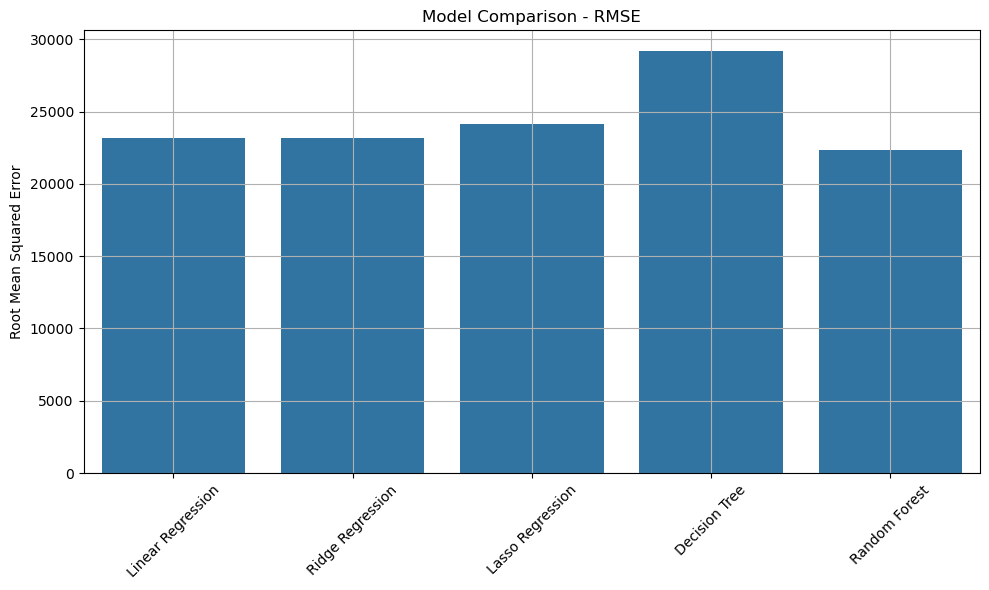

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="RMSE")
plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")
plt.xlabel("")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Display All Metrics


In [8]:
results_df = results_df.sort_values(by="RMSE")
print("\nModel Performance Summary:")
print(results_df.to_string(index=False))


Model Performance Summary:
            Model       R2          MAE          MSE         RMSE
    Random Forest 0.863218 15845.295573 4.988696e+08 22335.389704
Linear Regression 0.852461 17018.114713 5.381016e+08 23197.017576
 Ridge Regression 0.852428 17003.961975 5.382213e+08 23199.596660
 Lasso Regression 0.840122 16420.078162 5.831051e+08 24147.569856
    Decision Tree 0.766761 19762.566000 8.506679e+08 29166.211878
